In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 41.3 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.11-py3-none-any.whl size=114544 sha256=ebd76085f208d45ae37e7f9582f3bc34b9c3c2d04bb8cfa66fac3f1cb6df2ac0
  Stored in directory: /tmp/pip-ephem-wheel-cache-mp89x00m/wheels/23/f8/91/b098b62aadcdea186ae3dc01e1fbc606a95848d86c01fb4387
Successfully built kaggle

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/opt/app-root/src/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/opt/app-root/src')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

2024-04-11 03:02:39.107756: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-11 03:02:42.443713: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/opt/app-root/src/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/opt/app-root/src/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 [==============================] - 1034s 2s/step - loss: 0.5743 - accuracy: 0.7038 - val_loss: 0.5343 - val_accuracy: 0.7426
Epoch 2/5
625/625 [==============================] - 1013s 2s/step - loss: 0.4788 - accuracy: 0.7706 - val_loss: 0.4815 - val_accuracy: 0.7764
Epoch 3/5
625/625 [==============================] - 1018s 2s/step - loss: 0.4083 - accuracy: 0.8130 - val_loss: 0.4996 - val_accuracy: 0.7872
Epoch 4/5
625/625 [==============================] - 1058s 2s/step - loss: 0.3512 - accuracy: 0.8466 - val_loss: 2.3523 - val_accuracy: 0.5100
Epoch 5/5
625/625 [==============================] - 1052s 2s/step - loss: 0.2801 - accuracy: 0.8802 - val_loss: 0.4693 - val_accuracy: 0.8044


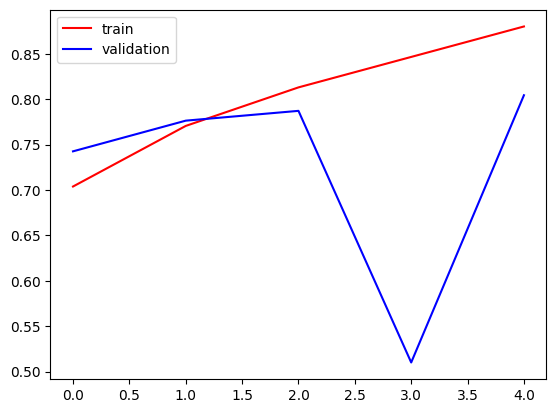

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

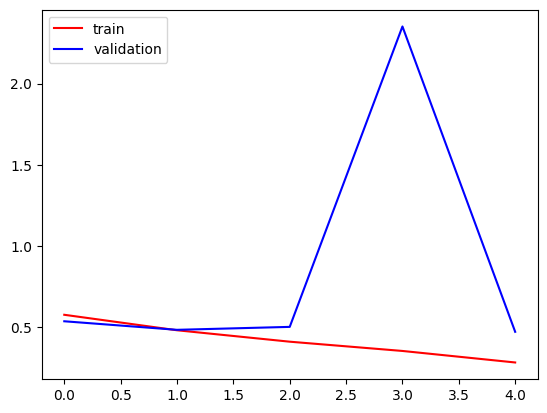

In [43]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [44]:
pip install opencv-python


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
import cv2

In [47]:
test_img = cv2.imread('cat.jpg')

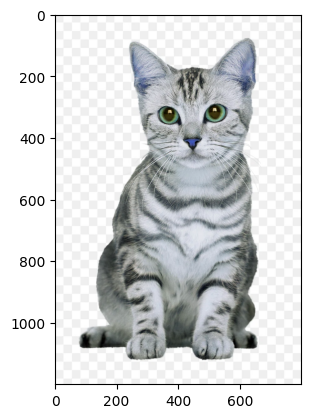

In [48]:
plt.imshow(test_img)

In [49]:
test_img.shape

(1200, 800, 3)

In [50]:
test_img = cv2.resize(test_img,(256,256))

In [51]:
test_input = test_img.reshape((1,256,256,3))

In [53]:
prediction = model.predict(test_input)

1/1 [==============================] - 0s 25ms/step


In [61]:
print (type(prediction))

<class 'numpy.ndarray'>


In [ ]:
! pip install kafka-python opencv-python psycopg2-binary
import numpy as np
from kafka import KafkaConsumer
import cv2
import psycopg2
consumer = KafkaConsumer("my-topic",bootstrap_servers=['3.109.237.85:9092'],
                        api_version=(0,10,1))

# Function to process the image
def process_image(image):
    # Convert bytes to numpy array
    nparr = np.frombuffer(image, np.uint8)
    # Decode image
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    # Reshape and resize
    img = cv2.resize(img, (256, 256))
    img = img.reshape((1,256,256,3))
    return img

def save_db(prediction):
    # Connect to PostgreSQL database
    conn = psycopg2.connect(
        dbname="animal",
        user="admin",
        password="redhat",
        host="3.109.237.85",
        port="5432"
    )
    # Create a cursor
    cur = conn.cursor()
    try:
        # Execute the INSERT statement
        cur.execute("INSERT INTO animal (prediction) VALUES (%s)", (prediction,))
        # Commit the transaction
        conn.commit()
        print("Prediction saved to the database successfully!")
    except Exception as e:
        # Rollback the transaction if any error occurs
        conn.rollback()
        print("Error while saving prediction to the database:", e)
    finally:
        # Close the cursor and connection
        cur.close()
        conn.close()

for message in consumer:
    processed_image = process_image(message.value)
    prediction = model.predict(processed_image)
    save_db(float(prediction[0][0]))
    


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
1/1 [==============================] - 0s 36ms/step
<class 'numpy.ndarray'>
<class 'float'>
Prediction saved to the database successfully!


In [51]:
import cv2

In [33]:
test_img = cv2.imread('/opt/app-root/src/dog.jpg')

In [34]:
test_img = image

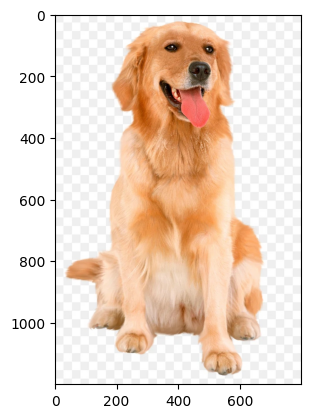

In [35]:
plt.imshow(test_img)

In [36]:
test_img.shape

AttributeError: 'Image' object has no attribute 'shape'

In [37]:
test_img = cv2.resize(test_img,(256,256))

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [38]:
test_input = test_img.reshape((1,256,256,3))

AttributeError: 'Image' object has no attribute 'reshape'

In [39]:
model.predict(test_input)

NameError: name 'test_input' is not defined

In [40]:
! pip install psycopg2-binary

import psycopg2

def insert_image(image_data, image_name):
  """Inserts an image into a PostgreSQL database table from a variable.

  Args:
      image_data: The image data in bytes format.
      image_name: Name of the image to store in the database.
  """
  # Connect to PostgreSQL database
  connection = psycopg2.connect(
      host="3.109.237.85",
      port="5432",
      database="animal",
      user="admin",
      password="redhat")

  cursor = connection.cursor()

  # Create a table named 'images' if it doesn't exist (modify as needed)
  cursor.execute("""CREATE TABLE IF NOT EXISTS images (
    id SERIAL PRIMARY KEY,
    name VARCHAR(255) NOT NULL,
    data BYTEA NOT NULL
  );""")
#     
  cursor.execute("ALTER TABLE images ADD data VARCHAR(1000);")

  # Insert image data into the table
  cursor.execute("INSERT INTO images (name, data) VALUES (%s, %s)", (image_name, image_data))
    


  connection.commit()
  print(f"Image '{image_name}' inserted successfully!")

  connection.close()

# Example usage
# Read the image data from a file (replace 'path/to/your/image.jpg' with your actual path)
with open('dog.jpg', 'rb') as image_file:
  image_data = image_file.read()

image_name = "My Image"
insert_image(image_data, image_name)



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


StringDataRightTruncation: value too long for type character varying(1000)


In [20]:
import psycopg2

# Replace with your connection details
host = "3.109.237.85"
database = "animal"
user = "admin"
password = "redhat"
port = "5432"

conn = psycopg2.connect(host=host, database=database, user=user, password=password)

# Replace "your_table" and "prediction" with your actual table and column names
sql = "UPDATE animal SET prediction = %s WHERE id = %s"  # Update based on an ID

# You can also use INSERT if you're creating a new row
# sql = "INSERT INTO your_table (id, prediction) VALUES (%s, %s)"

cursor = conn.cursor()

# Get the variable value you want to store
prediction_value = prediction

# ID of the row to update (replace with actual ID)
id_value = 1  # Example ID

cursor.execute(sql, (prediction_value, id_value))

conn.commit()  # Commit changes to the database

cursor.close()
conn.close()  # Close connection



NameError: name 'prediction' is not defined